# Band Ratios: Literature Search

Here we will explore the prevalence of band-ratio measures in the literature.

To do so, we will use [LISC](https://github.com/lisc-tools/lisc), a Python module for collecting and analyzing scientific literature. 

For more information on what LISC is and how it works, check out the LISC [documentation](https://lisc-tools.github.io/lisc/).

To explore the prevalence and use cases of band ratio measures, we will collect information from the Pubmed database on the number of papers that include terms of interest, as well as the number of papers including terms of interest co-ocurring with specified association terms.

Note that collecting literature data in this way will be an under-estimate of the use of band-ratio measures.

This is since the search approach used here only returns articles for which terms of interest appear in the title and/or abstract, returning only the most relevant papers. Many more papers are likely to mention and apply ratio measures. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('talk')

In [2]:
# Import LISC code
from lisc import Counts
from lisc.plts.counts import plot_matrix
from lisc.plts.utils import get_cmap

In [3]:
# Initialize counts object
counts = Counts()

In [4]:
# Settings for literature collection
db = 'pubmed'

### Define Ratio Terms

First, we will define a list of search terms to search for band ratio measures of interest. 

The following ratios were not included, as they do not return enough papers in our restricted title / abstract search:
- delta gamma ratio
- alpha gamma ratio

In [5]:
# Set terms list
br_terms = [['delta theta ratio', 'delta/theta ratio', 'theta delta ratio'],
            ['delta alpha ratio', 'delta/alpha', 'alpha delta ratio'],
            ['delta beta ratio', 'beta delta ratio'],
            ['theta alpha ratio', 'theta/alpha ratio', 'alpha theta ratio'],
            ['theta beta ratio', 'theta/beta ratio', 'beta theta ratio'],
            ['theta gamma ratio', 'theta/gamma ratio'],
            ['alpha beta ratio', 'beta alpha ratio', 'alpha/beta ratio']
           ]

# Set exclusion terms
#   Only ABR has specific inclusions, to restrict to relevant papers
#   This is because there is a lot of synonymous use of the term 'alpha beta ratio'
br_inclusions = [[], [], [], [], [], [], ['EEG', 'electroencephalography']]

# Check that the search terms and exclusions line up
assert len(br_terms) == len(br_inclusions)

### Define Association Terms

We will also define a set of association terms, so that we can explore what ratio measures are used for in the literature.

In [6]:
assoc_terms = [
    ['ADHD', 'attention deficit hyperactivity disorder'],
    ['executive function', 'attentional control', 'cognitive control'],
    ['neurofeedback'],
    ['sleep', 'polysomnography'], 
    ['stroke', 'ischemia', 'brain injury', 'coma'], 
    ['learning', 'memory', 'cognitive impairment', 'dementia']
]

In [7]:
# Add band-ratio terms to object
counts.add_terms(br_terms)
counts.add_terms(br_inclusions, term_type='inclusions')

In [8]:
# Add association terms to object
counts.add_terms(assoc_terms, dim='B')

In [9]:
# Check terms
counts.terms['A'].check_terms()

List of terms used: 

delta theta ratio  : delta theta ratio, delta/theta ratio, theta delta ratio
delta alpha ratio  : delta alpha ratio, delta/alpha, alpha delta ratio
delta beta ratio   : delta beta ratio, beta delta ratio
theta alpha ratio  : theta alpha ratio, theta/alpha ratio, alpha theta ratio
theta beta ratio   : theta beta ratio, theta/beta ratio, beta theta ratio
theta gamma ratio  : theta gamma ratio, theta/gamma ratio
alpha beta ratio   : alpha beta ratio, beta alpha ratio, alpha/beta ratio


In [10]:
# Check terms
counts.terms['B'].check_terms()

List of terms used: 

ADHD                : ADHD, attention deficit hyperactivity disorder
executive function  : executive function, attentional control, cognitive control
neurofeedback       : neurofeedback
sleep               : sleep, polysomnography
stroke              : stroke, ischemia, brain injury, coma
learning            : learning, memory, cognitive impairment, dementia


In [11]:
# Run the data collection
counts.run_collection(db=db)

In [12]:
# Check how many papers were found for each ratio search term
counts.check_counts()

The number of documents found for each search term is:
  'delta theta ratio'   -    13
  'delta alpha ratio'   -    73
  'delta beta ratio'    -    15
  'theta alpha ratio'   -    55
  'theta beta ratio'    -   102
  'theta gamma ratio'   -     8
  'alpha beta ratio'    -    20


In [13]:
# Since different ratios have different numbers of results, we will normalize the association results
counts.compute_score('normalize', dim='A')

In [17]:
# Set adapted versions of the labels to use as plot labels
ratio_labels = ['delta / theta', 'delta / alpha ', 'delta / beta ', 'theta / alpha',
                'theta / beta', 'theta / gamma', 'alpha / beta']
assoc_labels = ['ADHD', 'attention', 'neurofeedback', 'sleep', 'stroke', 'learning']

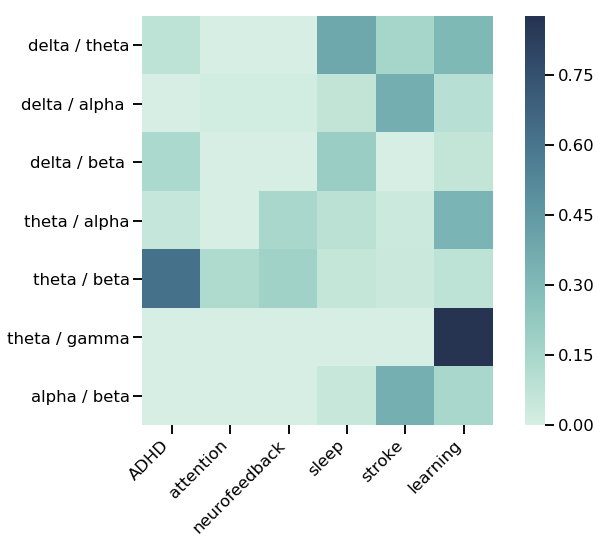

In [18]:
# Plot the associations of band ratio measures in the literature
fig, ax = plt.subplots(figsize=(10, 8))
plot_matrix(counts.score, assoc_labels, ratio_labels, cmap='blue', square=True, ax=ax)
plt.xticks(rotation=45, horizontalalignment='right');
plt.savefig("../figures/OverviewFigs/LISC-Associations.pdf")

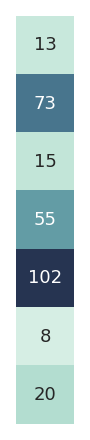

In [19]:
# Plot the number of papers found per ratio measure

dat = np.expand_dims(counts.terms['A'].counts, 1)

fig, ax = plt.subplots(figsize=(2.5, 7.5))
sns.heatmap(dat,
            cmap=get_cmap('blue'),
            xticklabels=[],
            yticklabels=[],
            annot=True, annot_kws={"size": 18}, cbar=False, fmt='d', square=True);
plt.savefig("../figures/OverviewFigs/LISC-Ratios.pdf")